# Data Preprocessing

## Imputation
You will often find yourself in a situation where you will be dealing with an incomplete dataset.  There are many reasons why data may be missing: survey responses may have been optional, there may have been some sort of data recording error, or the information may simply just not be available.  There are a plethora of ways to handle such situations, several of which we will explore in this exercise.

1 - Go do the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) and download the [Beijing PM2.5 Data](http://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data), put it into a dataframe, giving the columns the proper names.  Also be sure to familarize yourself with the data set before proceeding.

In [1]:
import pandas as pd
import numpy as np

### Attribute Information:

- No: row number 
- year: year of data in this row 
- month: month of data in this row 
- day: day of data in this row 
- hour: hour of data in this row 
- pm2.5: PM2.5 concentration (ug/m^3) 
- DEWP: Dew Point (ƒ) 
- TEMP: Temperature (ƒ) 
- PRES: Pressure (hPa) 
- cbwd: Combined wind direction 
- Iws: Cumulated wind speed (m/s) 
- Is: Cumulated hours of snow 
- Ir: Cumulated hours of rain 

In [2]:
pm2 = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',
                  na_values='NA')
pm2.columns = ['id', 'year', 'month', 'day', 'hour', 'pm2', 'dew_point', 'temperature',
               'pressure', 'wind_dir', 'wind_speed', 'hours_snow', 'hours_rain']

In [3]:
pm2.head()

,id,year,month,day,hour,pm2,dew_point,temperature,pressure,wind_dir,wind_speed,hours_snow,hours_rain
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
pm2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
id             43824 non-null int64
year           43824 non-null int64
month          43824 non-null int64
day            43824 non-null int64
hour           43824 non-null int64
pm2            41757 non-null float64
dew_point      43824 non-null int64
temperature    43824 non-null float64
pressure       43824 non-null float64
wind_dir       43824 non-null object
wind_speed     43824 non-null float64
hours_snow     43824 non-null int64
hours_rain     43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


There ore over 2000 samples with the pm 2.5 value missing: since this is the value to predict I am going to drop them.

In [5]:
pm2.dropna(inplace=True)

In [6]:
pm2.describe().T

,count,mean,std,min,25%,50%,75%,max
id,41757.0,22279.380104,12658.168415,25.00,11464.00,22435.00,33262.00,43824.00
year,41757.0,2012.042771,1.415311,2010.00,2011.00,2012.00,2013.00,2014.00
month,41757.0,6.513758,3.454199,1.00,4.00,7.00,10.00,12.00
day,41757.0,15.685514,8.785539,1.00,8.00,16.00,23.00,31.00
hour,41757.0,11.502311,6.924848,0.00,5.00,12.00,18.00,23.00
pm2,41757.0,98.613215,92.050387,0.00,29.00,72.00,137.00,994.00
dew_point,41757.0,1.750174,14.433658,-40.00,-10.00,2.00,15.00,28.00
temperature,41757.0,12.401561,12.175215,-19.00,2.00,14.00,23.00,42.00
pressure,41757.0,1016.442896,10.300733,991.00,1008.00,1016.00,1025.00,1046.00
wind_speed,41757.0,23.866747,49.617495,0.45,1.79,5.37,21.91,565.49


In [7]:
pm2.describe(include=['O'])

,wind_dir
count,41757
unique,4
top,SE
freq,14573


In [8]:
pm2.wind_dir.value_counts()

SE    14573
NW    13484
cv     8944
NE     4756
Name: wind_dir, dtype: int64

2 - Suppose our data became corrupted after we downloaded it and values were missing.  Randomly insert 5000 `NaN` into the dataset accross all the columns.

In [9]:
# setting the seed
np.random.seed(0)
# creating an array of dimension equal to the number of cells of the dataframe and with exactly 5000 ones
dim = pm2.shape[0]*pm2.shape[1]
arr = np.array([0]*(dim-5000) + [1]*5000)
# shuffling and reshaping the array
np.random.shuffle(arr)
arr = arr.reshape(pm2.shape[0], pm2.shape[1])
# looping through all the values and setting the corresponding position in the dataframe to nan
it = np.nditer(arr, flags=['multi_index'])
while not it.finished:
    if it[0] == 1:
        pm2.iloc[it.multi_index[0], it.multi_index[1]] = np.nan
    it.iternext()

In [ ]:
# solution: inserted nans on all columns at random

data_na = pm2.copy()
nrow = data_na.shape[0]

for col in data_na:
    rows = np.random.randint(0, nrow, 5000)
    data_na[col].iloc[rows] = np.nan

In [10]:
pm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 13 columns):
id             41355 non-null float64
year           41375 non-null float64
month          41379 non-null float64
day            41380 non-null float64
hour           41339 non-null float64
pm2            41409 non-null float64
dew_point      41376 non-null float64
temperature    41364 non-null float64
pressure       41357 non-null float64
wind_dir       41379 non-null object
wind_speed     41372 non-null float64
hours_snow     41381 non-null float64
hours_rain     41375 non-null float64
dtypes: float64(12), object(1)
memory usage: 4.5+ MB


3 - Which variables lend themselves to be in a regression model?  Select those variables, and then fit a regression model for each of the following imputation strategies, commenting on your results.
    - Dropping all rows with at least 1 NA
    - Dropping all rows with at least 3 NA
    - Imputing 0
    - Mean
    - Median
    - Mode

In [11]:
# I'm dropping wind_dir and id
regr_cols = ['year', 'month', 'day', 'hour', 'dew_point', 'temperature',
             'pressure', 'wind_speed', 'hours_snow', 'hours_rain', 'pm2']
pm2_regr = pm2.loc[:, regr_cols]
# in the solution there is no year, month, day and hour
# also, he discards hours_snow and hours_rain (though they aren't binary or categorical)

In [12]:
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()
# X = pm2_regr.iloc[:, :-1]
# y = pm2_regr.iloc[:, -1]
# Xtrain, Xtest, ytrain, ytest = train_test_split(pm2_regr.iloc[:, :-1], pm2_regr.iloc[:, -1], test_size=0.2, random_state=0)

In [14]:
#just a note to self
pm2_regr1 = pm2_regr.dropna(thresh=7) # same as dropna without thresh
# thresh is the number of non nan columns required to mantain the rows
pm2_regr1 = pm2_regr.dropna(thresh=5)
pm2_regr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 11 columns):
year           41375 non-null float64
month          41379 non-null float64
day            41380 non-null float64
hour           41339 non-null float64
dew_point      41376 non-null float64
temperature    41364 non-null float64
pressure       41357 non-null float64
wind_speed     41372 non-null float64
hours_snow     41381 non-null float64
hours_rain     41375 non-null float64
pm2            41409 non-null float64
dtypes: float64(11)
memory usage: 3.8 MB


Dropping all rows with at least 1 NA:

In [15]:
lr.fit(pm2_regr.dropna().iloc[:, :-1], pm2_regr.dropna().iloc[:, -1])
lr.score(pm2_regr.dropna().iloc[:, :-1], pm2_regr.dropna().iloc[:, -1])

0.25931902790725536

Dropping all row with at least 3 NA gets me an error because I have nans in some rows:

In [16]:
lr.fit(pm2_regr.dropna(thresh=5).iloc[:, :-1], pm2_regr.dropna(thresh=5).iloc[:, -1])
lr.score(pm2_regr.dropna(thresh=5).iloc[:, :-1], pm2_regr.dropna(thresh=5).iloc[:, -1])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Imputing 0:

In [17]:
lr.fit(pm2_regr.fillna(0).iloc[:, :-1], pm2_regr.fillna(0).iloc[:, -1])
lr.score(pm2_regr.fillna(0).iloc[:, :-1], pm2_regr.fillna(0).iloc[:, -1])

0.23169738288430264

Imputing the mean:

In [18]:
imp = Imputer(strategy='mean')
pm2_regr_mean = imp.fit_transform(pm2_regr)

In [19]:
lr.fit(pm2_regr_mean[:, :-1], pm2_regr_mean[:, -1])
lr.score(pm2_regr_mean[:, :-1], pm2_regr_mean[:, -1])

0.24398233090399435

The median:

In [20]:
imp = Imputer(strategy='median')
pm2_regr_median = imp.fit_transform(pm2_regr)

In [21]:
lr.fit(pm2_regr_median[:, :-1], pm2_regr_median[:, -1])
lr.score(pm2_regr_median[:, :-1], pm2_regr_median[:, -1])

0.2432914069947677

And the mode:

In [22]:
imp = Imputer(strategy='most_frequent')
pm2_regr_mode = imp.fit_transform(pm2_regr)

In [23]:
lr.fit(pm2_regr_mode[:, :-1], pm2_regr_mode[:, -1])
lr.score(pm2_regr_mode[:, :-1], pm2_regr_mode[:, -1])

0.22927544059073748

The best result I get is from simply dropping all rows with NAs, mean and median gives similar performances while the mode is the worst imputation (surprisingly worst than imputing 0, which is quite random).

Overall all strategies doesn't yield good results, I guess this fit is bad in general.

4 - Given the results in part (3), and your own ingenuity, come up with a new imputation strategy and try it out.  Comment on your results.

I'm going to drop rows with NAs for the columns year, month and hour, pm2; I'm imputing the median for all other columns:

In [24]:
pm2_regr_imp = pm2_regr.dropna(subset=['year', 'month', 'day', 'hour', 'pm2'])
imp = Imputer(strategy = 'median')
pm2_regr_imp = imp.fit_transform(pm2_regr_imp)

In [25]:
lr.fit(pm2_regr_imp[:, :-1], pm2_regr_imp[:, -1])
lr.score(pm2_regr_imp[:, :-1], pm2_regr_imp[:, -1])

0.24626708848663914

The result is slightly better than simply imputing mean or median, but still worse than dropping all NAs.

## Categorical Data
Sometimes your data will contain categorical variables which need to be handled carefully depending on the machine learning algorithm you choose to use.  Encoding categorical variables comes in two flavors: oridinal (ordered) and nominal (unordered) features.  In this exercise, you'll further explore the Beijing PM2.5 dataset, this time using categorical variables.

1 - Which variables are categorical?  Encode them properly, taking care to insure that they are properly classified as either ordinal or nominal.

There is one categorical variable:

In [26]:
pm2.describe(include=['O'])

,wind_dir
count,41379
unique,4
top,SE
freq,14438


The variable is nominal, so I'm going to use one-hot encoding:

In [27]:
# for simplicity I'm using pandas function
pm2_enc = pd.get_dummies(pm2)

In [28]:
pm2_enc = pm2_enc.loc[:, regr_cols[:-1] + ['wind_dir_NE', 'wind_dir_NW', 'wind_dir_SE', 'wind_dir_cv'] + regr_cols[-1:]].dropna()

In [ ]:
# from solutions using sklearn:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

l_enc = LabelEncoder()
oh_enc = OneHotEncoder(sparse=False)

# change categorical data labels to integers
data_sub = pm2.copy()
data_sub.wind_dir = l_enc.fit_transform(data_sub.wind_dir)

# one-hot encode
dummies = pd.DataFrame(oh_enc.fit_transform(data_sub.wind_dir.values.reshape(-1, 1)), columns=l_enc.classes_)

# join with original df
data_sub = data_sub.drop('wind_dir', axis=1)
data_sub = data_sub.join(dummies)
data_sub.head()

2 - Perform a multilinear regression, using the classified data, removing the `NA` values.  Comment on your results.

In [29]:
lr.fit(pm2_enc.iloc[:, :-1], pm2_enc.iloc[:, -1])
lr.score(pm2_enc.iloc[:, :-1], pm2_enc.iloc[:, -1])

0.27572117822430642

The results are a bit better than before, but the performances are still very bad.

3 - Create a new encoding for days in which it rained, snowed, neither, and both, and then rerun the regression.  Are the results any better?

In [30]:
# hours_snow and hours_rain are cumulative across days, so I'm taking the max for each day to see if it snowed
days = pm2_enc.groupby(['year', 'month', 'day'])['hours_snow', 'hours_rain'].max()
# creating columns for the encodings
days['snow'] = pd.Series(days['hours_snow'] > 0, dtype='int')
days['rain'] = pd.Series(days['hours_rain'] > 0, dtype='int')
days['rain_snow'] = pd.Series((days['hours_rain'] > 0) & (days['hours_snow'] > 0), dtype='int')
days['no_rain_snow'] = pd.Series((days['hours_rain'] == 0) & (days['hours_snow'] == 0), dtype='int')
# resetting index and dropping hours_snow and hours_rain
days.reset_index(inplace=True)
days.drop(['hours_snow', 'hours_rain'], inplace=True, axis=1)

In [31]:
# joining the dataframe with the new columns to the original one
pm2_enc = pm2_enc.merge(days, left_on=['year', 'month', 'day'], right_on=['year', 'month', 'day'])

In [32]:
pm2_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37718 entries, 0 to 37717
Data columns (total 19 columns):
year            37718 non-null float64
month           37718 non-null float64
day             37718 non-null float64
hour            37718 non-null float64
dew_point       37718 non-null float64
temperature     37718 non-null float64
pressure        37718 non-null float64
wind_speed      37718 non-null float64
hours_snow      37718 non-null float64
hours_rain      37718 non-null float64
wind_dir_NE     37718 non-null uint8
wind_dir_NW     37718 non-null uint8
wind_dir_SE     37718 non-null uint8
wind_dir_cv     37718 non-null uint8
pm2             37718 non-null float64
snow            37718 non-null int32
rain            37718 non-null int32
rain_snow       37718 non-null int32
no_rain_snow    37718 non-null int32
dtypes: float64(11), int32(4), uint8(4)
memory usage: 4.2 MB


In [33]:
lr.fit(pm2_enc.iloc[:, :-1], pm2_enc.iloc[:, -1])
lr.score(pm2_enc.iloc[:, :-1], pm2_enc.iloc[:, -1])

1.0

Wow, now the fit is perfect!

4 - Create a new encoding for the quartile that a day falls under by wind speed and rerun the regression.  Comment on your results.

In [34]:
# using pandas cut and subtracting 0.1 to include the min values
pm2_enc['wind_speed_quartile'] = pd.cut(pm2_enc.wind_speed,
                                        bins=list(pm2_enc.wind_speed.quantile([0])-0.1) + list(pm2_enc.wind_speed.quantile([0.25, 0.5, 0.75, 1])),
                                        labels=[0.25, 0.5, 0.75, 1])

In [ ]:
# from solutions: using np.percentile:
quartile = np.percentile(data_sub['wind_speed_quartile'], [25, 50, 75, 100])

cat = []
for row in range(len(data_sub)):
    wind_speed = data_sub['wind_speed_quartile'].iloc[row]
    if wind_speed <= quartile[0]:
        cat.append('1st')
    if wind_speed <= quartile[1]:
        cat.append('2nd')
    if wind_speed <= quartile[2]:
        cat.append('3rd')
    if wind_speed <= quartile[3]:
        cat.append('4th')

data_sub['wind_quart'] = cat
# and then create dummies...

In [ ]:
# transforming the column in numeric
pm2_enc.wind_speed_quartile = pd.to_numeric(pm2_enc.wind_speed_quartile)

In [30]:
lr.fit(pm2_enc.iloc[:, :-1], pm2_enc.iloc[:, -1])
lr.score(pm2_enc.iloc[:, :-1], pm2_enc.iloc[:, -1])

0.52880432110447051

The accuracy has gone down again after adding this new column, this may be due to the fact that this adds useless noise to the data or that this binning is too coarse maybe.

5 - Create a new encoding for deciles of the `DEWP` variable.  Then select the row containing the highest temperature, and using `Pandas` `category` data type, select all rows in a lesser `DEWP` decile than this row.

In [31]:
# using pandas cut and subtracting 0.1 to include the min values
pm2_enc['dew_point_decile'] = pd.cut(pm2_enc.dew_point,
                                        bins=list(pm2_enc.dew_point.quantile([0])-0.1) + list(pm2_enc.dew_point.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])))

In [ ]:
# from solutions: not using cut but creating new column and then:

data_sub.dew_dec = pd.Categorical(data_sub.dew_dec, categories=data_sub.dew_dec.unique(), ordered=True)

In [32]:
decile = pm2_enc.iloc[pm2_enc.temperature.argmax()].dew_point_decile
print(decile)
pm2_enc.loc[pm2_enc.dew_point_decile < decile]

(2.0, 8.0]


,year,month,day,hour,dew_point,temperature,pressure,wind_speed,hours_snow,hours_rain,...,wind_dir_NW,wind_dir_SE,wind_dir_cv,pm2,snow,rain,rain_snow,no_rain_snow,wind_speed_quartile,dew_point_decile
0,2010.0,1.0,2.0,0.0,-16.0,-4.0,1020.0,1.79,0.0,0.0,...,0,1,0,129.0,1,0,0,0,0.25,"(-18.0, -13.0]"
1,2010.0,1.0,2.0,1.0,-15.0,-4.0,1020.0,2.68,0.0,0.0,...,0,1,0,148.0,1,0,0,0,0.50,"(-18.0, -13.0]"
2,2010.0,1.0,2.0,2.0,-11.0,-5.0,1021.0,3.57,0.0,0.0,...,0,1,0,159.0,1,0,0,0,0.50,"(-13.0, -8.0]"
3,2010.0,1.0,2.0,3.0,-7.0,-5.0,1022.0,5.36,1.0,0.0,...,0,1,0,181.0,1,0,0,0,0.50,"(-8.0, -4.0]"
4,2010.0,1.0,2.0,4.0,-7.0,-5.0,1022.0,6.25,2.0,0.0,...,0,1,0,138.0,1,0,0,0,0.75,"(-8.0, -4.0]"
5,2010.0,1.0,2.0,5.0,-7.0,-6.0,1022.0,7.14,3.0,0.0,...,0,1,0,109.0,1,0,0,0,0.75,"(-8.0, -4.0]"
6,2010.0,1.0,2.0,6.0,-7.0,-6.0,1023.0,8.93,4.0,0.0,...,0,1,0,105.0,1,0,0,0,0.75,"(-8.0, -4.0]"
7,2010.0,1.0,2.0,8.0,-8.0,-6.0,1024.0,12.51,0.0,0.0,...,0,1,0,120.0,1,0,0,0,0.75,"(-13.0, -8.0]"
8,2010.0,1.0,2.0,9.0,-7.0,-5.0,1025.0,14.30,0.0,0.0,...,0,1,0,132.0,1,0,0,0,0.75,"(-8.0, -4.0]"
9,2010.0,1.0,2.0,10.0,-7.0,-5.0,1026.0,17.43,1.0,0.0,...,0,1,0,140.0,1,0,0,0,0.75,"(-8.0, -4.0]"


## Feature Scaling
Many of the machine learning algorithms we have at our disposal require that the feautures be on the the same scale in order to work properly.  In this exercise, you'll test out a few techniques with and without feature scaling and observe the outcomes.

1 - Head over to the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), download the [Wine Dataset](http://archive.ics.uci.edu/ml/datasets/Wine), and put it in a dataframe, being sure to label the columns properly.

In [33]:
wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
wine.columns = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_ash', 'magnesium', 'total_phenols',
                'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity',
                'hue', 'OD280_OD315', 'proline']

In [34]:
wine.head()

,class,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


2 - Fit a Nearest Neighbors model to the data, using a normalized data set, a stardardized data set, and the original.  Split into test and train sets and compute the accuracy of the classifications and comment on your results.

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

Original dataset:

In [36]:
Xtrain, Xtest, ytrain, ytest = train_test_split(wine.iloc[:, 1:], wine.iloc[:, 0], test_size=0.3, random_state=0)
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)
print(knn.score(Xtrain, ytrain))
print(knn.score(Xtest, ytest))

0.790322580645
0.722222222222


Normalized dataset:

In [37]:
mms = MinMaxScaler()
Xtrain_norm = mms.fit_transform(Xtrain)
Xtest_norm = mms.transform(Xtest)

knn.fit(Xtrain_norm, ytrain)
print(knn.score(Xtrain_norm, ytrain))
print(knn.score(Xtest_norm, ytest))

0.967741935484
1.0


Standardized dataset:

In [38]:
ssc = StandardScaler()
Xtrain_std = ssc.fit_transform(Xtrain)
Xtest_std = ssc.transform(Xtest)

knn.fit(Xtrain_std, ytrain)
print(knn.score(Xtrain_std, ytrain))
print(knn.score(Xtest_std, ytest))

0.975806451613
1.0


The accuracy is way better for a normalized or standardized dataset, with the least having a slightly better generalization: K-Nearest Neighbors is sensitive to feature scaling.

3 - Fit a Naive Bayes model to the data, using a normalized data set, a standardized data set, and the original.  Comment on your results.

In [39]:
from sklearn.naive_bayes import GaussianNB

Original dataset:

In [40]:
gnb = GaussianNB()

gnb.fit(Xtrain, ytrain)
print(gnb.score(Xtrain, ytrain))
print(gnb.score(Xtest, ytest))

0.983870967742
0.944444444444


Normalized dataset:

In [41]:
gnb.fit(Xtrain_norm, ytrain)
print(gnb.score(Xtrain_norm, ytrain))
print(gnb.score(Xtest_norm, ytest))

0.983870967742
0.944444444444


Standardized dataset:

In [42]:
gnb.fit(Xtrain_std, ytrain)
print(gnb.score(Xtrain_std, ytrain))
print(gnb.score(Xtest_std, ytest))

0.983870967742
0.944444444444


For this algorithm there is no difference at all, so scaling the data isn't necessary.

## Feature Selection
With many datasets, you will find yourself in a situation where not all of the provided features are relevant to your model and it may be best to discard them.  This is a very complex topic, involving many techniques, a few of which we will explore in this exercise, using the `Boston` housing data.

1 - From sklearn import the `load_boston` package, and put the data into a data frame with the proper column names, and then split into training and testing sets.

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_target = boston.target

In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(boston_df, boston_target, test_size=0.3, random_state=0)

2 - Fit a series of least squares multilinear regression models to the data, and use the F-Statistic to select the K best features for values of `k` ranging from `1` to the total number of features.  Plot the MSE for each model against the test set and print the best features for each iteration.  Comment on your results.

In [5]:
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import mean_squared_error

In [7]:
# in the solutions he uses f_regression and not f_classif
# also, best features are obtained by cols[sel.get_support()] with cols = Xtrain.columns
# and lr is instantiated with normalize=True

from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression

mse = []
cols = Xtrain.columns
lr = LinearRegression(normalize=True)

# looping through the number of features desired and storing the results in mse
for k in range(1, boston_df.shape[1]+1):
    # using SelectKBest with the F-statistic as the score
    sel = SelectKBest(score_func=f_regression, k=k)
    # fitting the selector
    sel.fit(Xtrain, ytrain)
    # transforming train and test sets
    Xtrain_k = sel.transform(Xtrain)
    Xtest_k = sel.transform(Xtest)
    # fitting linear regression model and printing out the k best features
    lr.fit(Xtrain_k, ytrain)
    print('Top {} features {}'.format(sel.k, cols[sel.get_support()]))
    mse.append(mean_squared_error(lr.predict(Xtest_k), ytest))

Top 1 features Index(['LSTAT'], dtype='object')
Top 2 features Index(['RM', 'LSTAT'], dtype='object')
Top 3 features Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')
Top 4 features Index(['INDUS', 'RM', 'PTRATIO', 'LSTAT'], dtype='object')
Top 5 features Index(['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')
Top 6 features Index(['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')
Top 7 features Index(['INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')
Top 8 features Index(['INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')
Top 9 features Index(['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')
Top 10 features Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO',
       'LSTAT'],
      dtype='object')
Top 11 features Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')
Top 12 features Inde

In [8]:
mse

[39.817150504744163,
 32.725071692814936,
 33.426174254778516,
 33.514812256758411,
 33.941382846798568,
 33.945815157082791,
 33.388969094681421,
 31.906854569362178,
 31.897354107703546,
 31.600132144384535,
 30.623108795919531,
 27.696011416585776,
 27.183847647603191]

In [54]:
mse = []
# looping through the number of features desired and storing the results in mse
for k in range(1, boston_df.shape[1]+1):
    # using SelectKBest with the F-statistic as the score
    sel = SelectKBest(score_func=f_classif, k=k)
    # fitting the selector
    sel.fit(Xtrain, ytrain)
    # transforming train and test sets
    Xtrain_k = sel.transform(Xtrain)
    Xtest_k = sel.transform(Xtest)
    # fitting linear regression model and printing out the k best features
    lr.fit(Xtrain_k, ytrain)
    print('Top {} features {}'.format(k, pd.Series(sel.scores_, index=Xtrain.columns).\
                                      sort_values(ascending=False).\
                                      head(k).index.values))
    mse.append(mean_squared_error(lr.predict(Xtest_k), ytest))

Top 1 features ['LSTAT']
Top 2 features ['LSTAT' 'CRIM']
Top 3 features ['LSTAT' 'CRIM' 'RM']
Top 4 features ['LSTAT' 'CRIM' 'RM' 'AGE']
Top 5 features ['LSTAT' 'CRIM' 'RM' 'AGE' 'B']
Top 6 features ['LSTAT' 'CRIM' 'RM' 'AGE' 'B' 'TAX']
Top 7 features ['LSTAT' 'CRIM' 'RM' 'AGE' 'B' 'TAX' 'NOX']
Top 8 features ['LSTAT' 'CRIM' 'RM' 'AGE' 'B' 'TAX' 'NOX' 'RAD']
Top 9 features ['LSTAT' 'CRIM' 'RM' 'AGE' 'B' 'TAX' 'NOX' 'RAD' 'INDUS']
Top 10 features ['LSTAT' 'CRIM' 'RM' 'AGE' 'B' 'TAX' 'NOX' 'RAD' 'INDUS' 'PTRATIO']
Top 11 features ['LSTAT' 'CRIM' 'RM' 'AGE' 'B' 'TAX' 'NOX' 'RAD' 'INDUS' 'PTRATIO' 'ZN']
Top 12 features ['LSTAT' 'CRIM' 'RM' 'AGE' 'B' 'TAX' 'NOX' 'RAD' 'INDUS' 'PTRATIO' 'ZN'
 'DIS']
Top 13 features ['LSTAT' 'CRIM' 'RM' 'AGE' 'B' 'TAX' 'NOX' 'RAD' 'INDUS' 'PTRATIO' 'ZN'
 'DIS' 'CHAS']


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

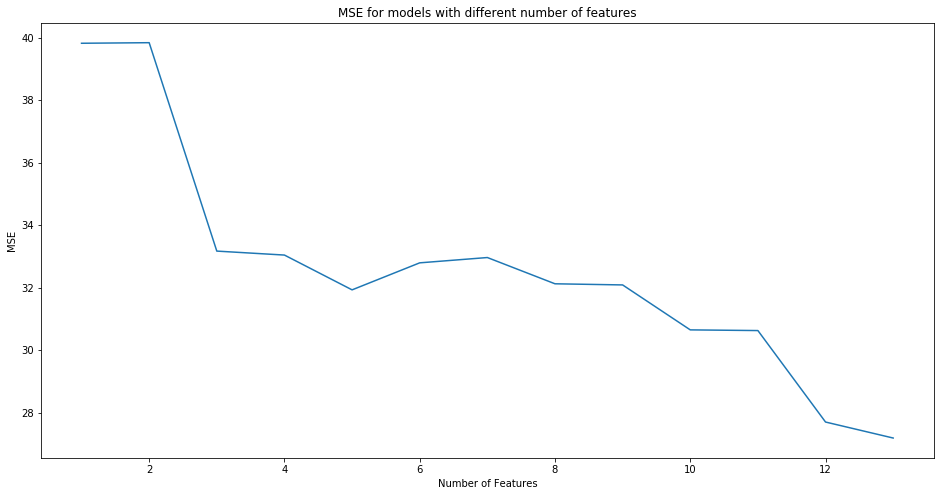

In [55]:
plt.figure(figsize=(16, 8))
plt.plot(range(1, len(mse)+1), mse)
plt.title('MSE for models with different number of features')
plt.xlabel('Number of Features')
plt.ylabel('MSE');

The MSE keeps going down adding features, there is a great gain after the 11th feature is added.

3 - Do the same as in part (2) instead this time using recursive feature selection.

In [50]:
from sklearn.feature_selection import RFE

In [51]:
mse = []
# looping through the number of features desired and storing the results in mse
for k in range(1, boston_df.shape[1]+1):
    # using Recursive Feature Selection with linear regression as estimator
    sel = RFE(estimator=lr, n_features_to_select=k)
    # fitting the selector
    sel.fit(Xtrain, ytrain)
    # transforming train and test sets
    Xtrain_k = sel.transform(Xtrain)
    Xtest_k = sel.transform(Xtest)
    # fitting linear regression model and printing out the k best features
    lr.fit(Xtrain_k, ytrain)
    print('Top {} features {}'.format(k, pd.Series(sel.support_, index=Xtrain.columns).\
                                      sort_values(ascending=False).\
                                      head(k).index.values))
    mse.append(mean_squared_error(lr.predict(Xtest_k), ytest))

Top 1 features ['NOX']
Top 2 features ['RM' 'NOX']
Top 3 features ['RM' 'NOX' 'CHAS']
Top 4 features ['PTRATIO' 'RM' 'NOX' 'CHAS']
Top 5 features ['PTRATIO' 'DIS' 'RM' 'NOX' 'CHAS']
Top 6 features ['LSTAT' 'PTRATIO' 'DIS' 'RM' 'NOX' 'CHAS']
Top 7 features ['LSTAT' 'PTRATIO' 'DIS' 'RM' 'NOX' 'CHAS' 'CRIM']
Top 8 features ['LSTAT' 'PTRATIO' 'RAD' 'DIS' 'RM' 'NOX' 'CHAS' 'CRIM']
Top 9 features ['LSTAT' 'PTRATIO' 'RAD' 'DIS' 'RM' 'NOX' 'CHAS' 'ZN' 'CRIM']
Top 10 features ['LSTAT' 'PTRATIO' 'TAX' 'RAD' 'DIS' 'RM' 'NOX' 'CHAS' 'ZN' 'CRIM']
Top 11 features ['LSTAT' 'PTRATIO' 'TAX' 'RAD' 'DIS' 'RM' 'NOX' 'CHAS' 'INDUS' 'ZN' 'CRIM']
Top 12 features ['LSTAT' 'PTRATIO' 'TAX' 'RAD' 'DIS' 'AGE' 'RM' 'NOX' 'CHAS' 'INDUS' 'ZN'
 'CRIM']
Top 13 features ['LSTAT' 'B' 'PTRATIO' 'TAX' 'RAD' 'DIS' 'AGE' 'RM' 'NOX' 'CHAS' 'INDUS'
 'ZN' 'CRIM']


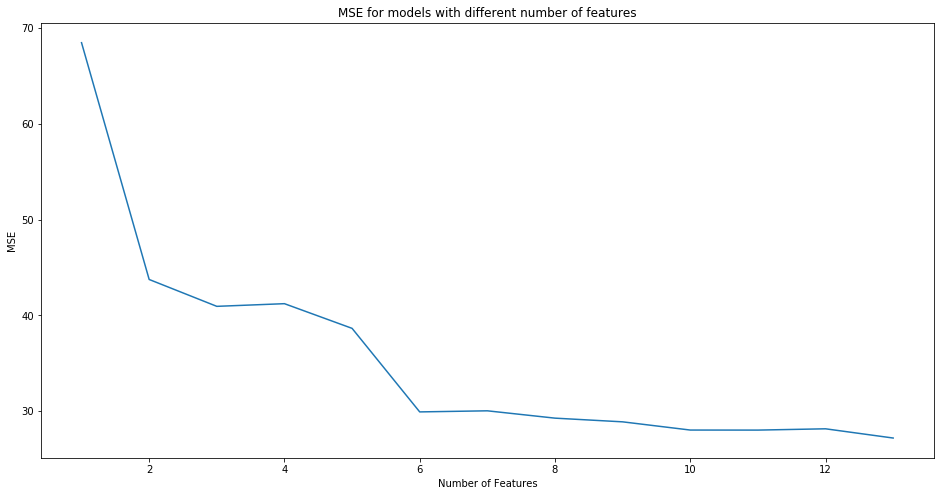

In [52]:
plt.figure(figsize=(16, 8))
plt.plot(range(1, len(mse)+1), mse)
plt.title('MSE for models with different number of features')
plt.xlabel('Number of Features')
plt.ylabel('MSE');

The MSE keeps going down adding features but after the sixth feature is added there isn't much improvement.

4 - Fit a Ridge Regression model to the data and use recursive feature elimination and `SelectFromModel` in `sklearn` to select your features.  Generate the same plots and best features as in parts (2) and (3) and comment and compare your results to what you have found previously.

In [ ]:
# in solutions he doesn't use select from model but repeats the previous exercise only using ridge instead
# ok no, it does both

In [21]:
# in selectfrommodel it uses c_vals = np.arange(0.1, 2.1, 0.1) to loop through and the threshold is set to
# str(c) + '*mean' for c in c_vals
# also, he always fits the ridge model

from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel
# fitting ridge regression
ridge = Ridge()
c_vals = np.arange(0.1, 2.1, 0.1)
cols = Xtrain.columns

mse = []
# looping through the possible threshholds from above and storing the results in mse
for c in c_vals:
    # using SelectFromModel with the ridge scores from above
    selfrmod = SelectFromModel(ridge, threshold=str(c) + '*mean')
    # fitting the selector
    selfrmod.fit(Xtrain, ytrain)
    # transforming train and test sets
    Xtrain_k = selfrmod.transform(Xtrain)
    Xtest_k = selfrmod.transform(Xtest)
    # fitting linear regression model and printing out the k best features
    ridge.fit(Xtrain_k, ytrain)
    print('c={} features {}'.format(c, cols[selfrmod.get_support()]))
    mse.append(mean_squared_error(ridge.predict(Xtest_k), ytest))

c=0.1 features Index(['CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')
c=0.2 features Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')
c=0.30000000000000004 features Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')
c=0.4 features Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO'], dtype='object')
c=0.5 features Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO'], dtype='object')
c=0.6 features Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO'], dtype='object')
c=0.7000000000000001 features Index(['CHAS', 'NOX', 'RM', 'DIS'], dtype='object')
c=0.8 features Index(['CHAS', 'NOX', 'RM', 'DIS'], dtype='object')
c=0.9 features Index(['CHAS', 'NOX', 'RM', 'DIS'], dtype='object')
c=1.0 features Index(['CHAS', 'NOX', 'RM', 'DIS'], dtype='object')
c=1.1 features Index(['CHAS', 'NOX', 'RM'], dtype='object')
c=1.2000000000000002 features Index(['CHAS', 'NOX', 'RM'], dtype='object')
c=1.3000000000000003 features Index(['CHAS', 'NOX', 'RM'], dtype

In [22]:
mse

[30.381411907076952,
 30.058877215058555,
 30.058877215058555,
 39.880365155466372,
 39.880365155466372,
 39.880365155466372,
 40.711281688327347,
 40.711281688327347,
 40.711281688327347,
 40.711281688327347,
 41.059776421045399,
 41.059776421045399,
 41.059776421045399,
 41.059776421045399,
 41.059776421045399,
 41.059776421045399,
 41.059776421045399,
 43.600677124666888,
 43.600677124666888,
 43.600677124666888]

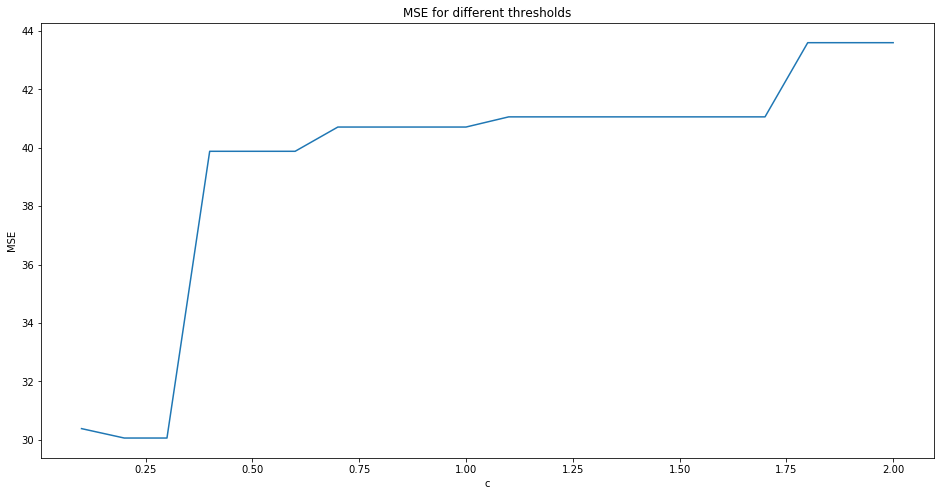

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 8))
plt.plot(c_vals, mse)
plt.title('MSE for different thresholds')
plt.xlabel('c')
plt.ylabel('MSE');

In [56]:
from sklearn.linear_model import Ridge
# from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
# fitting ridge regression
ridge = Ridge()
ridge.fit(Xtrain, ytrain)
# storing features importance
coef = ridge.coef_

mse = []
# looping through the possible threshholds from above and storing the results in mse
for k, thresh in enumerate(sorted(coef, reverse=True)):
    # using SelectFromModel with the ridge scores from above
    selfrmod = SelectFromModel(ridge, threshold=thresh)
    # fitting the selector
    selfrmod.fit(Xtrain, ytrain)
    # transforming train and test sets
    Xtrain_k = selfrmod.transform(Xtrain)
    Xtest_k = selfrmod.transform(Xtest)
    # fitting linear regression model and printing out the k best features
    lr.fit(Xtrain_k, ytrain)
    print('Top {} features {}'.format(k+1, pd.Series(ridge.coef_, index=Xtrain.columns).\
                                      sort_values(ascending=False).\
                                      head(k+1).index.values))
    mse.append(mean_squared_error(lr.predict(Xtest_k), ytest))

Top 1 features ['RM']
Top 2 features ['RM' 'CHAS']
Top 3 features ['RM' 'CHAS' 'RAD']
Top 4 features ['RM' 'CHAS' 'RAD' 'ZN']
Top 5 features ['RM' 'CHAS' 'RAD' 'ZN' 'B']
Top 6 features ['RM' 'CHAS' 'RAD' 'ZN' 'B' 'TAX']
Top 7 features ['RM' 'CHAS' 'RAD' 'ZN' 'B' 'TAX' 'AGE']
Top 8 features ['RM' 'CHAS' 'RAD' 'ZN' 'B' 'TAX' 'AGE' 'INDUS']
Top 9 features ['RM' 'CHAS' 'RAD' 'ZN' 'B' 'TAX' 'AGE' 'INDUS' 'CRIM']
Top 10 features ['RM' 'CHAS' 'RAD' 'ZN' 'B' 'TAX' 'AGE' 'INDUS' 'CRIM' 'LSTAT']
Top 11 features ['RM' 'CHAS' 'RAD' 'ZN' 'B' 'TAX' 'AGE' 'INDUS' 'CRIM' 'LSTAT' 'PTRATIO']
Top 12 features ['RM' 'CHAS' 'RAD' 'ZN' 'B' 'TAX' 'AGE' 'INDUS' 'CRIM' 'LSTAT' 'PTRATIO'
 'DIS']
Top 13 features ['RM' 'CHAS' 'RAD' 'ZN' 'B' 'TAX' 'AGE' 'INDUS' 'CRIM' 'LSTAT' 'PTRATIO'
 'DIS' 'NOX']


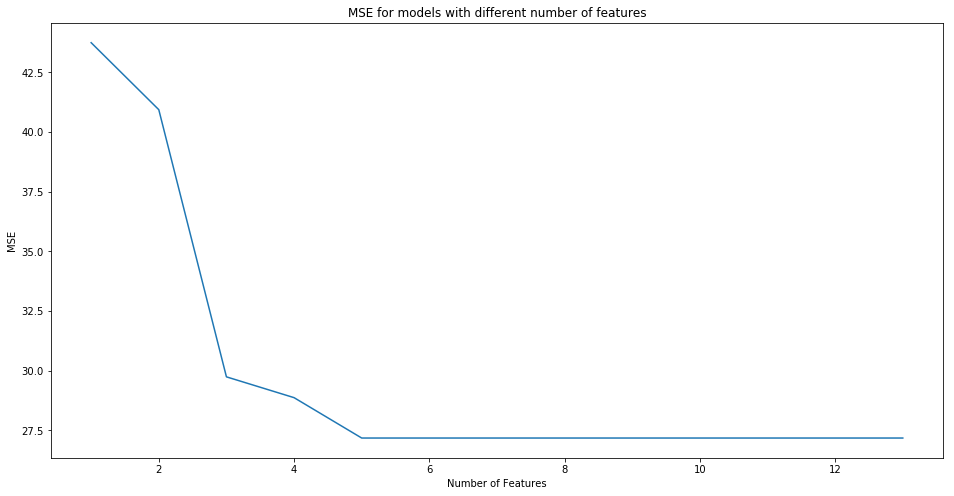

In [57]:
plt.figure(figsize=(16, 8))
plt.plot(range(1, len(mse)+1), mse)
plt.title('MSE for models with different number of features')
plt.xlabel('Number of Features')
plt.ylabel('MSE');

After the fourth feature there is no improvement.

Also, the MSE seems better than all the trials before.

5 - L1 regularization can also be used for model selection.  Choose an algorithm in `sklearn` and repeat part (4) using model selection via regularization.

In [24]:
# again, in solutions he uses the c_vals as before and he fits the lasso

from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
# fitting ridge regression
lasso = LassoCV()
c_vals = np.arange(0.1, 2.1, 0.1)
cols = Xtrain.columns

mse = []
# looping through the possible threshholds from above and storing the results in mse
for c in c_vals:
    # using SelectFromModel with the ridge scores from above
    selfrmod = SelectFromModel(lasso, threshold=str(c) + '*mean')
    # fitting the selector
    selfrmod.fit(Xtrain, ytrain)
    # transforming train and test sets
    Xtrain_k = selfrmod.transform(Xtrain)
    Xtest_k = selfrmod.transform(Xtest)
    # fitting linear regression model and printing out the k best features
    lasso.fit(Xtrain_k, ytrain)
    print('c={} features {}'.format(c, cols[selfrmod.get_support()]))
    mse.append(mean_squared_error(lasso.predict(Xtest_k), ytest))

c=0.1 features Index(['CRIM', 'ZN', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')
c=0.2 features Index(['CRIM', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')
c=0.30000000000000004 features Index(['RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')
c=0.4 features Index(['RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')
c=0.5 features Index(['RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')
c=0.6 features Index(['RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')
c=0.7000000000000001 features Index(['RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')
c=0.8 features Index(['RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')
c=0.9 features Index(['RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')
c=1.0 features Index(['RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')
c=1.1 features Index(['RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')
c=1.2000000000000002 features Index(['RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')
c=1.3000000000000003 featu

In [25]:
mse

[31.703214268512056,
 32.200167969738231,
 32.581821738916972,
 32.581821738916972,
 32.581821738916972,
 32.581821738916972,
 31.776158436397562,
 31.776158436397562,
 31.776158436397562,
 31.776158436397562,
 31.776158436397562,
 31.776158436397562,
 31.776158436397562,
 31.776158436397562,
 31.776158436397562,
 31.776158436397562,
 31.776158436397562,
 31.776158436397562,
 31.776158436397562,
 45.568824859833477]

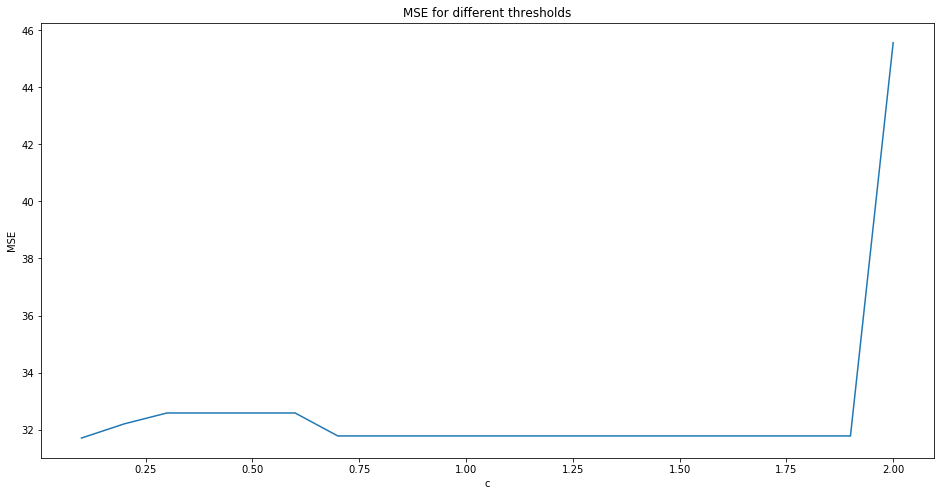

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 8))
plt.plot(c_vals, mse)
plt.title('MSE for different thresholds')
plt.xlabel('c')
plt.ylabel('MSE');

In [58]:
from sklearn.linear_model import LassoCV
# fitting lasso regression
lasso = LassoCV()
lasso.fit(Xtrain, ytrain)
# storing features importance
coef = lasso.coef_

mse = []
# looping through the possible threshholds from above and storing the results in mse
for k, thresh in enumerate(sorted(coef, reverse=True)):
    # using SelectFromModel with the lasso scores from above
    selfrmod = SelectFromModel(lasso, threshold=thresh)
    # fitting the selector
    selfrmod.fit(Xtrain, ytrain)
    # transforming train and test sets
    Xtrain_k = selfrmod.transform(Xtrain)
    Xtest_k = selfrmod.transform(Xtest)
    # fitting linear regression model and printing out the k best features
    lr.fit(Xtrain_k, ytrain)
    print('Top {} features {}'.format(k+1, pd.Series(lasso.coef_, index=Xtrain.columns).\
                                      sort_values(ascending=False).\
                                      head(k+1).index.values))
    mse.append(mean_squared_error(lr.predict(Xtest_k), ytest))

Top 1 features ['RM']
Top 2 features ['RM' 'RAD']
Top 3 features ['RM' 'RAD' 'ZN']
Top 4 features ['RM' 'RAD' 'ZN' 'B']
Top 5 features ['RM' 'RAD' 'ZN' 'B' 'AGE']
Top 6 features ['RM' 'RAD' 'ZN' 'B' 'AGE' 'NOX']
Top 7 features ['RM' 'RAD' 'ZN' 'B' 'AGE' 'NOX' 'CHAS']
Top 8 features ['RM' 'RAD' 'ZN' 'B' 'AGE' 'NOX' 'CHAS' 'INDUS']
Top 9 features ['RM' 'RAD' 'ZN' 'B' 'AGE' 'NOX' 'CHAS' 'INDUS' 'TAX']
Top 10 features ['RM' 'RAD' 'ZN' 'B' 'AGE' 'NOX' 'CHAS' 'INDUS' 'TAX' 'CRIM']
Top 11 features ['RM' 'RAD' 'ZN' 'B' 'AGE' 'NOX' 'CHAS' 'INDUS' 'TAX' 'CRIM' 'LSTAT']
Top 12 features ['RM' 'RAD' 'ZN' 'B' 'AGE' 'NOX' 'CHAS' 'INDUS' 'TAX' 'CRIM' 'LSTAT'
 'PTRATIO']
Top 13 features ['RM' 'RAD' 'ZN' 'B' 'AGE' 'NOX' 'CHAS' 'INDUS' 'TAX' 'CRIM' 'LSTAT'
 'PTRATIO' 'DIS']


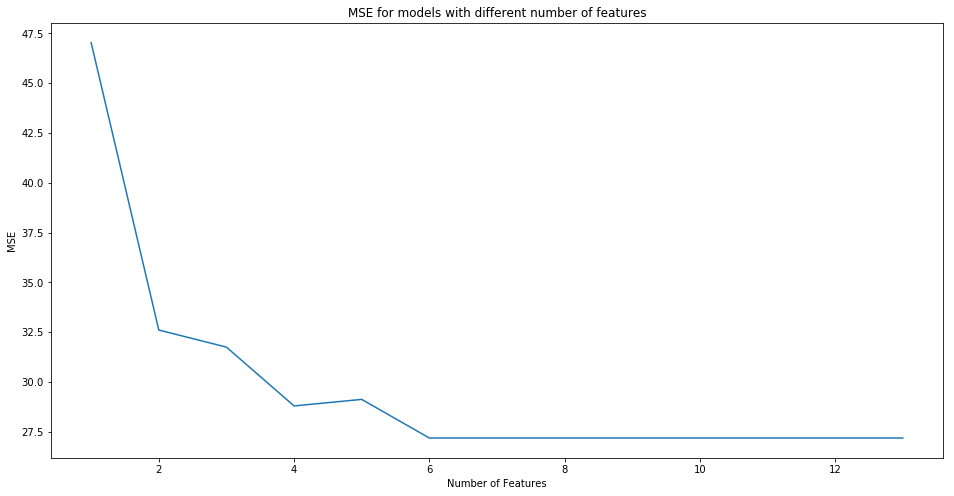

In [59]:
plt.figure(figsize=(16, 8))
plt.plot(range(1, len(mse)+1), mse)
plt.title('MSE for models with different number of features')
plt.xlabel('Number of Features')
plt.ylabel('MSE');

The performances are similar as before, but this time the improvement in MSE stops at 6 features instead of 4.

It should be noted that all the methods selected different subsets of features as optimal!